In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import torch
# Does this fix the hdf5 multiprocessing bug?
torch.multiprocessing.set_start_method("spawn")

# !git clone https://github.com/guydav/deep-learning-projects.git
# !pip install -q -r deep-learning-projects/requirements.txt
!wandb login 9676e3cc95066e4865586082971f2653245f09b4
sys.path.extend(('/home/cc/deep-learning-projects', '/home/cc/src/tqdm'))

Appending key for api.wandb.ai to your netrc file: /home/cc/.netrc
Successfully logged in to Weights & Biases!


In [3]:
import projects
from projects.metalearning import *

## Load the dataset

This time with 3x the batch size, 1.5k

In [4]:
ML_50K = '/home/cc/meta_learning_50k.h5'

normalized_train_dataset, train_dataloader, normalized_test_dataset, test_dataloader = \
        create_normalized_datasets(dataset_path=ML_50K, 
                                   batch_size=1500,
                                   num_workers=4,
                                   downsample_size=None,
                                   should_flip=False,
                                   return_indices=False,
                                   dataset_class_kwargs=dict(
                                       num_dimensions=3,
                                       features_per_dimension=(10, 10, 10)
                                   ))

Splitting test-train at 45000
Loaded normalization from cache
[0.4644661  0.45839542 0.45069984]
[0.11204559 0.11298621 0.12539756]


In [5]:
current_epoch = 0
save_dir = '/home/cc/checkpoints'

large_batch_no_dropout_test_model = PoolingDropoutCNNMLP(
    query_length=30,
    conv_filter_sizes=(16, 32, 48, 64),
    conv_output_size=4480, 
    mlp_layer_sizes=(512, 512, 512, 512),
    lr=4e-4, 
    weight_decay=1e-4, 
    conv_dropout=False,
    mlp_dropout=False,
    name='no_dropout_50k_cnn_mlp_large_batch',
    save_dir=save_dir)

large_batch_no_dropout_test_model.load_model(current_epoch)
large_batch_no_dropout_test_model = large_batch_no_dropout_test_model.cuda()

0


In [ ]:
# os.environ['WANDB_RUN_ID'] ='98w3kzlw'
# os.environ['WANDB_RESUME'] = 'must'
wandb.init(project="meta-learning") #, resume=True)

!wandb login 9676e3cc95066e4865586082971f2653245f09b4

# os.environ['WANDB_RUN_ID'] ='98w3kzlw'
# os.environ['WANDB_RESUME'] = 'must'
wandb.init(project="meta-learning") #, resume=True)

current_model = large_batch_no_dropout_test_model

wandb.config.lr = current_model.lr
wandb.config.decay = current_model.weight_decay
wandb.config.loss = 'CE'
wandb.config.batch_size = train_dataloader.batch_size

W&B Run: Not logged in, run wandb login
Call `%%wandb` in the cell containing your training loop to display live results.
Appending key for api.wandb.ai to your netrc file: /home/cc/.netrc
Successfully logged in to Weights & Biases!
W&B Run: https://app.wandb.ai/guy/meta-learning/runs/pgg44ivd
Call `%%wandb` in the cell containing your training loop to display live results.


2019-02-03 11:31:56: After epoch 1, TRAIN acc is 54.6033, loss is 0.6844, AUC is 0.5138
2019-02-03 11:32:53: After epoch 1, TEST acc is 55.0200, loss is 0.6833, AUC is 0.5195
2019-02-03 11:41:56: After epoch 2, TRAIN acc is 55.5222, loss is 0.6794, AUC is 0.5355
2019-02-03 11:42:51: After epoch 2, TEST acc is 56.0700, loss is 0.6651, AUC is 0.5298
2019-02-03 11:51:57: After epoch 3, TRAIN acc is 58.1511, loss is 0.6439, AUC is 0.5602
2019-02-03 11:52:54: After epoch 3, TEST acc is 59.9600, loss is 0.6254, AUC is 0.5683
2019-02-03 12:01:58: After epoch 4, TRAIN acc is 60.9400, loss is 0.6096, AUC is 0.5897
2019-02-03 12:02:53: After epoch 4, TEST acc is 62.4300, loss is 0.5896, AUC is 0.6008
2019-02-03 12:11:57: After epoch 5, TRAIN acc is 62.6322, loss is 0.5830, AUC is 0.6084
2019-02-03 12:12:53: After epoch 5, TEST acc is 63.4500, loss is 0.5711, AUC is 0.6204
2019-02-03 12:21:58: After epoch 6, TRAIN acc is 64.1800, loss is 0.5548, AUC is 0.6278
2019-02-03 12:22:53: After epoch 6, T

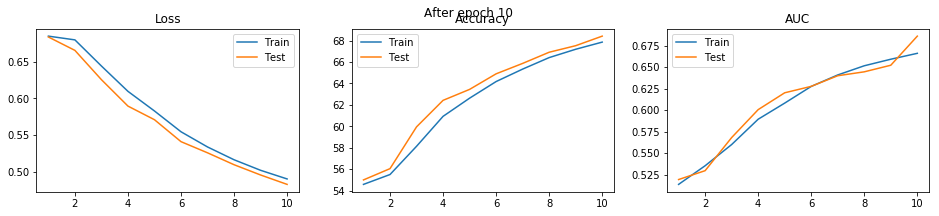

2019-02-03 13:11:58: After epoch 11, TRAIN acc is 68.8344, loss is 0.4742, AUC is 0.6769
2019-02-03 13:12:54: After epoch 11, TEST acc is 69.2400, loss is 0.4662, AUC is 0.6642
2019-02-03 13:21:58: After epoch 12, TRAIN acc is 69.3211, loss is 0.4631, AUC is 0.6805
2019-02-03 13:22:54: After epoch 12, TEST acc is 69.4100, loss is 0.4620, AUC is 0.6678
2019-02-03 13:31:57: After epoch 13, TRAIN acc is 69.4011, loss is 0.4603, AUC is 0.6818
2019-02-03 13:32:54: After epoch 13, TEST acc is 69.3300, loss is 0.4614, AUC is 0.6969
2019-02-03 13:41:58: After epoch 14, TRAIN acc is 69.3922, loss is 0.4589, AUC is 0.6816
2019-02-03 13:42:56: After epoch 14, TEST acc is 69.4000, loss is 0.4602, AUC is 0.6852
2019-02-03 13:52:00: After epoch 15, TRAIN acc is 69.4911, loss is 0.4586, AUC is 0.6823
2019-02-03 13:52:57: After epoch 15, TEST acc is 69.4000, loss is 0.4611, AUC is 0.6963
2019-02-03 14:02:02: After epoch 16, TRAIN acc is 69.4811, loss is 0.4579, AUC is 0.6819
2019-02-03 14:02:58: After

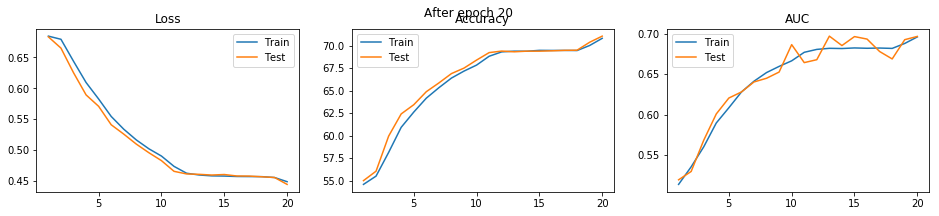

2019-02-03 14:52:07: After epoch 21, TRAIN acc is 71.5078, loss is 0.4379, AUC is 0.7035
2019-02-03 14:53:03: After epoch 21, TEST acc is 71.9300, loss is 0.4340, AUC is 0.7058
2019-02-03 15:02:07: After epoch 22, TRAIN acc is 72.3689, loss is 0.4270, AUC is 0.7100
2019-02-03 15:03:01: After epoch 22, TEST acc is 72.7700, loss is 0.4210, AUC is 0.7214
2019-02-03 15:12:05: After epoch 23, TRAIN acc is 73.1433, loss is 0.4161, AUC is 0.7198
2019-02-03 15:13:02: After epoch 23, TEST acc is 73.3400, loss is 0.4165, AUC is 0.7213
2019-02-03 15:22:09: After epoch 24, TRAIN acc is 73.7944, loss is 0.4115, AUC is 0.7298
2019-02-03 15:23:05: After epoch 24, TEST acc is 73.7200, loss is 0.4118, AUC is 0.7208
2019-02-03 15:32:10: After epoch 25, TRAIN acc is 74.2722, loss is 0.4080, AUC is 0.7355
2019-02-03 15:33:05: After epoch 25, TEST acc is 74.4500, loss is 0.4069, AUC is 0.7370
2019-02-03 15:42:09: After epoch 26, TRAIN acc is 75.2900, loss is 0.3930, AUC is 0.7454
2019-02-03 15:43:05: After

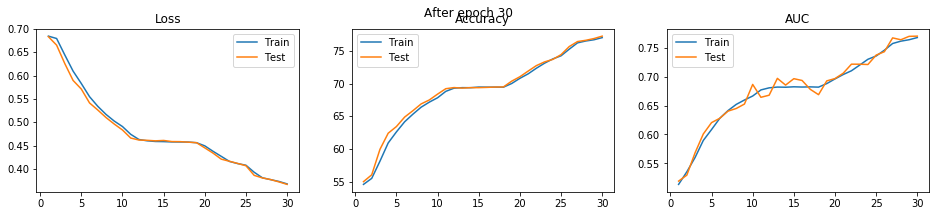

2019-02-03 16:32:16: After epoch 31, TRAIN acc is 77.3567, loss is 0.3632, AUC is 0.7710
2019-02-03 16:33:13: After epoch 31, TEST acc is 77.4700, loss is 0.3643, AUC is 0.7721
2019-02-03 16:42:16: After epoch 32, TRAIN acc is 77.7089, loss is 0.3586, AUC is 0.7750
2019-02-03 16:43:13: After epoch 32, TEST acc is 78.0400, loss is 0.3560, AUC is 0.7774
2019-02-03 16:52:17: After epoch 33, TRAIN acc is 78.2067, loss is 0.3489, AUC is 0.7802
2019-02-03 16:53:14: After epoch 33, TEST acc is 78.5800, loss is 0.3444, AUC is 0.7811
2019-02-03 17:02:18: After epoch 34, TRAIN acc is 79.1244, loss is 0.3365, AUC is 0.7892
2019-02-03 17:03:14: After epoch 34, TEST acc is 79.5700, loss is 0.3318, AUC is 0.7915
2019-02-03 17:12:17: After epoch 35, TRAIN acc is 79.6778, loss is 0.3272, AUC is 0.7948
2019-02-03 17:13:13: After epoch 35, TEST acc is 79.9100, loss is 0.3228, AUC is 0.7925
2019-02-03 17:22:17: After epoch 36, TRAIN acc is 80.2044, loss is 0.3192, AUC is 0.8001
2019-02-03 17:23:12: After

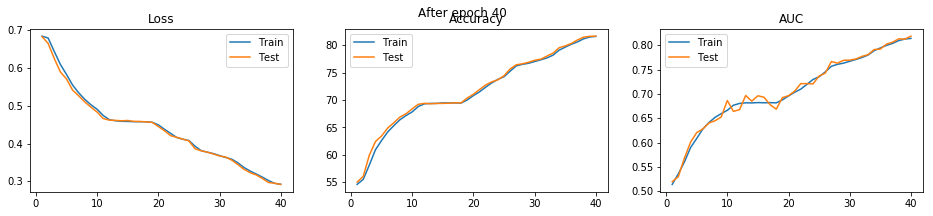

2019-02-03 18:12:19: After epoch 41, TRAIN acc is 81.7378, loss is 0.2901, AUC is 0.8155
2019-02-03 18:13:17: After epoch 41, TEST acc is 81.8100, loss is 0.2913, AUC is 0.8147
2019-02-03 18:22:21: After epoch 42, TRAIN acc is 81.8256, loss is 0.2883, AUC is 0.8166
2019-02-03 18:23:18: After epoch 42, TEST acc is 81.8400, loss is 0.2889, AUC is 0.8147
2019-02-03 18:32:23: After epoch 43, TRAIN acc is 81.8756, loss is 0.2871, AUC is 0.8171
2019-02-03 18:33:20: After epoch 43, TEST acc is 81.9400, loss is 0.2876, AUC is 0.8195
2019-02-03 18:42:23: After epoch 44, TRAIN acc is 81.8844, loss is 0.2866, AUC is 0.8174
2019-02-03 18:43:20: After epoch 44, TEST acc is 81.9800, loss is 0.2864, AUC is 0.8174
2019-02-03 18:52:28: After epoch 45, TRAIN acc is 81.9389, loss is 0.2861, AUC is 0.8179
2019-02-03 18:53:24: After epoch 45, TEST acc is 81.9700, loss is 0.2862, AUC is 0.8151
2019-02-03 19:02:29: After epoch 46, TRAIN acc is 81.9856, loss is 0.2857, AUC is 0.8184
2019-02-03 19:03:26: After

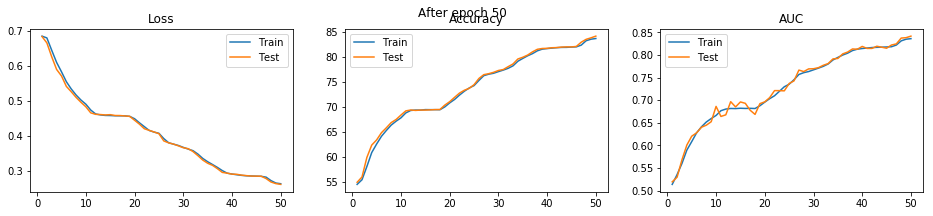

2019-02-03 19:52:34: After epoch 51, TRAIN acc is 84.8411, loss is 0.2517, AUC is 0.8487
2019-02-03 19:53:30: After epoch 51, TEST acc is 85.1600, loss is 0.2471, AUC is 0.8531
2019-02-03 20:02:35: After epoch 52, TRAIN acc is 85.3744, loss is 0.2427, AUC is 0.8541
2019-02-03 20:03:30: After epoch 52, TEST acc is 85.3500, loss is 0.2426, AUC is 0.8558
2019-02-03 20:12:34: After epoch 53, TRAIN acc is 85.4722, loss is 0.2406, AUC is 0.8552
2019-02-03 20:13:31: After epoch 53, TEST acc is 85.6300, loss is 0.2396, AUC is 0.8571
2019-02-03 20:22:37: After epoch 54, TRAIN acc is 85.5578, loss is 0.2390, AUC is 0.8558
2019-02-03 20:23:34: After epoch 54, TEST acc is 85.5800, loss is 0.2389, AUC is 0.8536
2019-02-03 20:32:39: After epoch 55, TRAIN acc is 85.5289, loss is 0.2385, AUC is 0.8556
2019-02-03 20:33:37: After epoch 55, TEST acc is 85.7400, loss is 0.2373, AUC is 0.8573
2019-02-03 20:42:41: After epoch 56, TRAIN acc is 85.9022, loss is 0.2306, AUC is 0.8595
2019-02-03 20:43:37: After

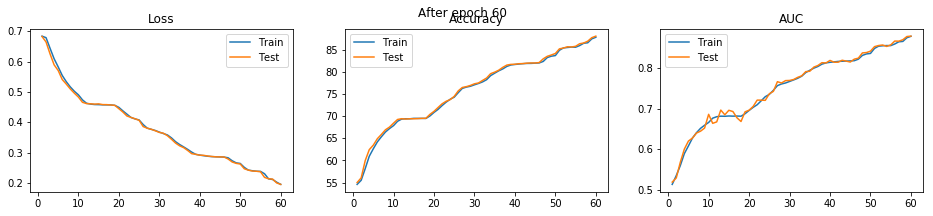

2019-02-03 21:32:48: After epoch 61, TRAIN acc is 87.9833, loss is 0.1926, AUC is 0.8807
2019-02-03 21:33:45: After epoch 61, TEST acc is 88.0300, loss is 0.1933, AUC is 0.8783


In [ ]:
total_epochs = 200
wandb.config.update(dict(epochs=total_epochs), allow_val_change=True)

train(large_batch_no_dropout_test_model, train_dataloader, test_dataloader, 
      num_epochs=total_epochs - current_epoch, epochs_to_test=1, epochs_to_graph=10, 
      num_batches_to_print=10000, start_epoch=current_epoch, watch=False)